# Importación de dependencias y de los archivos parquet

In [93]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

Los datos otorgados para realizar las predicciones ya están divididos entre datos de entrenamiento y datos de prueba. Desafortunadamente, esto significa que tendremos que revisar detalladamente ambos para revisar si 1. son consistentes entre sí y 2. realizar las mismas transformaciones y ajustes entre los dos para nuestros modelos:

In [94]:
train_dask = dd.read_parquet('../data/raw/train')
test_dask = dd.read_parquet('../data/raw/test')
train_dataset = train_dask.compute()
test_dataset = test_dask.compute()

#### Cabezal de los dataset

In [95]:
train_dataset.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn


In [96]:
test_dataset.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


#### Columnas en los dataset

In [97]:
train_dataset.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [98]:
train_dataset.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [99]:
test_dataset.columns

Index(['id', 'url', 'region', 'region_url', 'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'image_url', 'description', 'lat', 'long', 'state'],
      dtype='object')

In [100]:
test_dataset.dtypes

id                           int64
url                         object
region                      object
region_url                  object
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

Como es de esperar, ambos datasets tienen la misma cantidad de columnas (con la excepción de la variable objetivo). Podemos observar de inmediato un numero de campos que seran dificiles de procesar y usar para nuestras predicciones:
* La ID.
* Aquellos que contienen cadenas URLs en lugar de variables categoricas y/o numericas.
* Las descripciones. 

Estos pueden ser eliminados para que no entorpezcan nuestro analísis.

In [101]:
train_dataset.baths = train_dataset.baths.astype(np.int64)
test_dataset.baths = test_dataset.baths.astype(np.int64)

## Examinación de campos con tipo "object"

In [102]:
train_dataset.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', None,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [103]:
train_dataset.parking_options.unique()

array(['detached garage', 'carport', 'off-street parking', None,
       'attached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

# Conversión de campos a un formato aceptable para nuestro modelo de predicción

## Conversión de laundry_options y parking_options a campos binarios utilizando OneHotEncoder

In [104]:
oho = OneHotEncoder(dtype=np.int64,handle_unknown='ignore',sparse=False)
X = train_dataset[['laundry_options','parking_options']]
oho_df = pd.DataFrame(oho.fit_transform(X))
oho_df.index = train_dataset.index
oho_df.columns = oho.get_feature_names_out()
oho_df

c:\Users\pukeboy71\Documents\Henry-PI\predImmobiliario\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,laundry_options_laundry in bldg,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,laundry_options_None,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking,parking_options_None
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346474,0,1,0,0,0,0,0,0,0,0,0,0,0,1
346475,0,0,0,0,1,0,0,0,0,0,1,0,0,0
346476,0,0,0,1,0,0,0,0,0,0,1,0,0,0
346477,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [105]:
train_dataset.drop(['laundry_options','parking_options'], axis=1, inplace=True)
train_dataset = pd.concat([train_dataset, oho_df], axis=1)

# Visualización de nuestros datos

## Graficos de variables numericas

#### baths

<AxesSubplot: xlabel='baths'>

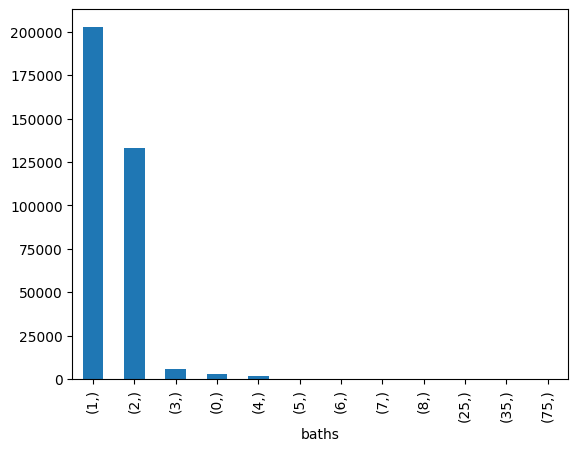

In [106]:
train_dataset[['baths']].value_counts().plot.bar()

Los valores por encima de 4 son lo suficientemente raros como para necesitar ser examinados uno por uno (no tiene mucho sentido que una casa tenga baños por encima de ese numero). Los valores encima de 8 se deberían borrar, debido a que van a entorpecer el modelo y crear un sesgo al entrenarlo

In [107]:
train_dataset[(train_dataset.baths > 4) & (train_dataset.baths <= 8)]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,...,laundry_options_w/d in unit,laundry_options_None,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking,parking_options_None
2195,north mississippi,1,cottage/cabin,2166,5,5,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3560,hawaii,3200,house,5078,6,6,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5715,panama city,3500,house,3097,4,5,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
6311,eastern panhandle,2996,house,7500,6,5,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
6944,SF bay area,15750,house,6000,7,5,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337477,north mississippi,1,cottage/cabin,2089,5,5,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
337510,palm springs,4510,house,3454,4,5,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
342664,SF bay area,15750,house,6000,7,5,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
343388,lafayette / west lafayette,560,apartment,1958,5,5,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [108]:
train_dataset[train_dataset.baths >= 25]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,...,laundry_options_w/d in unit,laundry_options_None,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking,parking_options_None
98062,youngstown,550,apartment,250,1000,25,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
252352,florida keys,1500,land,100,1000,35,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
316209,chicago,2449,apartment,1000,1100,75,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


Los valores entre 4 y 8 parecen ser validos considerando el numero de camas que hay en las viviendas correspondientes, así que los podemos dejar. 

#### beds

<AxesSubplot: xlabel='beds'>

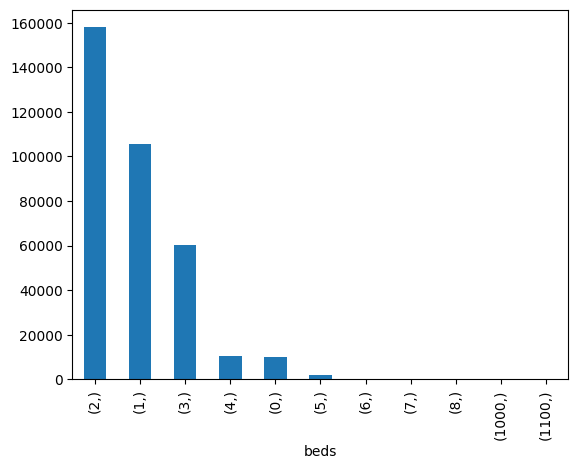

In [109]:
train_dataset[['beds']].value_counts().plot.bar()

Acá claramente hay un par de valores que son invalidos y caen fuera del alcance de nuestro modelo. Los valores que estan en el limite de la desviación estandar (6, 7 y 8) comprobamos anteriormente que correspondian con un alto numero de baños, así que podemos asumir que son legitimos aparte del caso en el que sean apartamentos.

#### sqfeet

<AxesSubplot: >

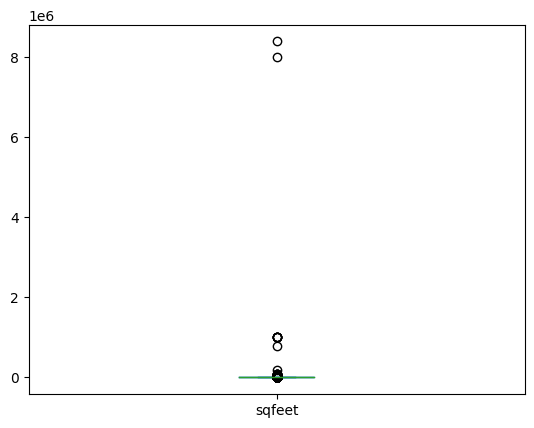

In [110]:
train_dataset['sqfeet'].plot.box()

Hay una cantidad numerosa de outliers que debemos quitar antes de entrenar nuestro modelo con nuestros datos: bastará con quitar aquellos que se salgan demasiado de la desviación estandar, y revisar aquellos que se encuentren alrededor de ese punto:

In [111]:
train_dataset['sqfeet'].std()

20185.373353131607

In [112]:
train_dataset['sqfeet'].median()

949.0

In [115]:
upperlimit = train_dataset['sqfeet'].std() + train_dataset['sqfeet'].median()
train_dataset[train_dataset.sqfeet >= upperlimit]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,...,laundry_options_w/d in unit,laundry_options_None,parking_options_attached garage,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking,parking_options_valet parking,parking_options_None
6030,tampa bay area,1090,apartment,775814,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,0,0
19072,san luis obispo,1350,house,95209,3,3,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
32488,new haven,2700,house,23000,4,2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
33474,kennewick-pasco-richland,2175,house,27700,5,2,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
41478,eastern CT,750,apartment,999999,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
47651,santa barbara,7250,house,1019856,4,2,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
53787,north dakota,1900,house,50000,3,2,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
72811,indianapolis,879,house,46205,2,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
100773,spokane / coeur d'alene,725,apartment,99204,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
108943,rhode island,1600,apartment,51206,2,2,1,1,1,0,...,1,0,0,0,0,0,1,0,0,0


#### Variables binarias

In [116]:
train_dataset.cats_allowed.unique()

array([1, 0], dtype=int64)

In [117]:
train_dataset.dogs_allowed.unique()

array([1, 0], dtype=int64)

In [118]:
train_dataset.smoking_allowed.unique()

array([1, 0], dtype=int64)

In [119]:
train_dataset.wheelchair_access.unique()

array([0, 1], dtype=int64)

In [120]:
train_dataset.electric_vehicle_charge.unique()

array([0, 1], dtype=int64)

In [121]:
train_dataset.comes_furnished.unique()

array([0, 1], dtype=int64)

#### state

In [122]:
train_dataset.state.unique()

array(['id', 'co', 'va', 'az', 'tn', 'tx', 'ma', 'ks', 'pa', 'me', 'ms',
       'la', 'mn', 'ky', 'wa', 'al', 'ca', 'ga', 'nc', 'md', 'ia', 'fl',
       'or', 'ar', 'hi', 'nj', 'ut', 'wv', 'ny', 'sc', 'oh', 'mo', 'mi',
       'ak', 'sd', 'ok', 'dc', 'in', 'ct', 'ri', 'ne', 'nd', 'nv', 'wi',
       'nh', 'de', 'il', 'nm', 'mt', 'vt', 'wy'], dtype=object)

Debido a que se tratan de variables categoricas no-ordinales, tendremos que utilizar algún encoder para crear nuestro modelo más adelante

#### lat & long

<AxesSubplot: xlabel='lat', ylabel='long'>

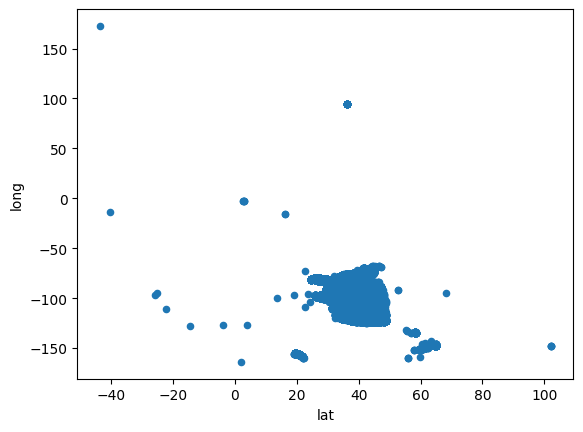

In [127]:
train_dataset.plot(kind='scatter',x='lat',y='long')

##### Outliers de lat

In [129]:
train_dataset['state'][train_dataset.lat > 100]

123663    la
135855    la
182941    la
206167    la
Name: state, dtype: object

In [132]:
train_dataset['lat'][train_dataset.state == 'la']

14        30.0165
40        30.1591
51        32.4150
67        32.6081
238       30.2024
           ...   
345887    30.2116
346058    30.4273
346156    30.1603
346157    30.1591
346373    30.0049
Name: lat, Length: 6544, dtype: float64

Los outliers positivos de lat se salen bastante de la norma en los valores que corresponden al estado de esas entradas en el dataframe, por lo que se van a borrar después.

In [141]:
train_dataset['state'][train_dataset.lat < -15]

6693      oh
90896     nj
208856    ca
235184    ny
322999    ia
Name: state, dtype: object

In [136]:
train_dataset['lat'][train_dataset.state == 'oh']

55        39.7824
60        39.6651
72        41.7222
135       40.0564
141       41.1379
           ...   
346329    39.3191
346351    39.9230
346403    41.0979
346453    39.7692
346462    39.7824
Name: lat, Length: 11616, dtype: float64

In [137]:
train_dataset['lat'][train_dataset.state == 'nj']

35        40.2418
99        39.6976
159       40.7466
167       39.9478
169       40.5823
           ...   
345925    40.3282
345936    39.8504
345940    40.7107
346362    39.8036
346463    39.9485
Name: lat, Length: 5128, dtype: float64

In [138]:
train_dataset['lat'][train_dataset.state == 'ca']

19        34.2696
30        34.0721
58        38.2771
74        32.7927
85        35.3457
           ...   
346413    38.0228
346428    39.4877
346439    38.4743
346459    33.4983
346475    32.6279
Name: lat, Length: 29791, dtype: float64

In [139]:
train_dataset['lat'][train_dataset.state == 'ny']

42        42.6362
112       40.6842
119       42.6615
261       40.7658
263       43.2193
           ...   
346252    40.7469
346314    43.0380
346368    43.0483
346404    43.0695
346478    42.8997
Name: lat, Length: 8977, dtype: float64

In [140]:
train_dataset['lat'][train_dataset.state == 'ia']

24        41.2769
80        41.6795
89        41.7011
225       42.0694
256       41.1618
           ...   
346294    41.1618
346360    41.9708
346385    40.8012
346425    42.5218
346436    41.6884
Name: lat, Length: 6744, dtype: float64

Lo mismo va para los outliers negativos de lat.

##### Outliers de long

In [1]:
train_dataset['state'][train_dataset.long > -30]

NameError: name 'train_dataset' is not defined

In [144]:
train_dataset['state'][train_dataset.long > 75]

591       ar
996       ar
1316      ar
7081      ar
9893      ar
          ..
338797    ar
339008    ar
339206    ar
341594    ar
341618    ar
Name: state, Length: 217, dtype: object

In [147]:
train_dataset['long'][(train_dataset.long < -30) & (train_dataset.state == 'ar')]

32       -92.3759
308      -90.5773
660      -94.1545
698      -92.5044
914      -92.3759
           ...   
345139   -92.2683
345562   -92.2233
345588   -92.5044
346284   -94.3278
346300   -92.4950
Name: long, Length: 2577, dtype: float64

Ya que estos valores corresponden al estado de Arizona, y la longitud de este estado es -111.093735, podemos asumir que los outliers que conseguimos anteriormente son invalidos y deben ser borrados.